In [1]:
# DATA PREPARATION AND FEATURE ENGINEERING

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Dataset import 

In [4]:
df = pd.read_csv('../Datasets/international_matches.csv', parse_dates=['date'])
df.tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [5]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [6]:
df.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [8]:
# PRE-ANALYSIS
# The dataset has a lot of blank fields that need to be fixed.
# However, before modifying any field, I want to analyze the teams' qualifications on the last FIFA date (June 2022). 
# This is important because, from these qualifications, I will create the
# inference dataset that enters the machine learning algorithm that predicts the World Cup matches.

In [9]:
fifa_rank = df[['date','home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank']]
home = fifa_rank[['date', 'home_team', 'home_team_fifa_rank']].rename(columns={"home_team":"team", "home_team_fifa_rank":"rank"})
away = fifa_rank[['date', 'away_team', 'away_team_fifa_rank']].rename(columns={"away_team":"team", "away_team_fifa_rank":"rank"})
fifa_rank = pd.concat([home, away])
#Select each country latest match
fifa_rank = fifa_rank.sort_values(['team', 'date'], ascending=[True, False])
last_rank = fifa_rank
fifa_rank_top10 = fifa_rank.groupby('team').first().sort_values('rank', ascending=True)[0:10].reset_index()
fifa_rank_top10

,team,date,rank
0,Brazil,2022-06-06,1
1,Belgium,2022-06-14,2
2,France,2022-06-13,3
3,Argentina,2022-06-05,4
4,England,2022-06-14,5
5,Italy,2022-06-14,6
6,Spain,2022-06-12,7
7,Portugal,2022-06-12,8
8,Mexico,2022-06-14,9
9,Netherlands,2022-06-14,10


In [10]:
# this will give France and Arguntina an advantage as they are from top 10


In [11]:
# Top 10 teams with the highest winning percentage at home and away

In [12]:
def home_percentage(team):
    score = len(df[(df['home_team'] == team) & (df['home_team_result'] == "Win")]) / len(df[df['home_team'] == team]) * 100
    return round(score)
def away_percentage(team):
    score = len(df[(df['away_team'] == team) & (df['home_team_result'] == "Lose")]) / len(df[df['away_team'] == team]) * 100
    return round(score)

In [13]:
fifa_rank_top10['Home_win_Per'] = np.vectorize(home_percentage)(fifa_rank_top10['team'])
fifa_rank_top10['Away_win_Per'] = np.vectorize(away_percentage)(fifa_rank_top10['team'])
fifa_rank_top10['Average_win_Per'] = round((fifa_rank_top10['Home_win_Per'] + fifa_rank_top10['Away_win_Per']) / 2)
fifa_rank_win = fifa_rank_top10.sort_values('Average_win_Per', ascending = False)
fifa_rank_win

,team,date,rank,Home_win_Per,Away_win_Per,Average_win_Per
0,Brazil,2022-06-06,1,78,60,69.0
6,Spain,2022-06-12,7,77,61,69.0
2,France,2022-06-13,3,66,57,62.0
3,Argentina,2022-06-05,4,68,49,58.0
4,England,2022-06-14,5,64,51,58.0
7,Portugal,2022-06-12,8,67,49,58.0
9,Netherlands,2022-06-14,10,62,55,58.0
5,Italy,2022-06-14,6,60,49,54.0
1,Belgium,2022-06-14,2,60,46,53.0
8,Mexico,2022-06-14,9,60,41,50.0


In [14]:
# Top 10 attacking teams in the last FIFA date

In [15]:
fifa_offense = df[['date', 'home_team', 'away_team', 'home_team_mean_offense_score', 'away_team_mean_offense_score']]
home = fifa_offense[['date', 'home_team', 'home_team_mean_offense_score']].rename(columns={"home_team":"team", "home_team_mean_offense_score":"offense_score"})
away = fifa_offense[['date', 'away_team', 'away_team_mean_offense_score']].rename(columns={"away_team":"team", "away_team_mean_offense_score":"offense_score"})
fifa_offense = pd.concat([home, away])
fifa_offense = fifa_offense.sort_values(['date', 'team'],ascending=[False, True])
last_offense = fifa_offense
fifa_offense_top10 = fifa_offense.groupby('team').first().sort_values('offense_score', ascending=False)[0:10].reset_index()
fifa_offense_top10

,team,date,offense_score
0,Argentina,2022-06-05,89.0
1,France,2022-06-13,88.3
2,England,2022-06-14,88.0
3,Brazil,2022-06-06,86.3
4,Portugal,2022-06-12,86.0
5,Belgium,2022-06-14,85.7
6,Italy,2022-06-14,85.3
7,Spain,2022-06-12,85.0
8,Poland,2022-06-14,84.7
9,Uruguay,2022-06-11,84.3


In [16]:
# Farace and arguntina are Offesnce teams 

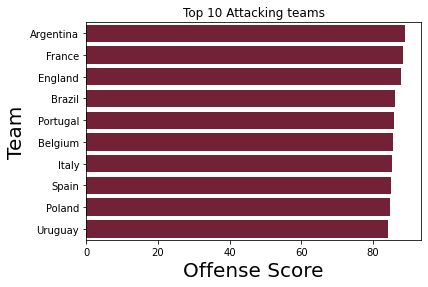

In [17]:
sns.barplot(data=fifa_offense_top10, x='offense_score', y='team', color="#7F1431")
plt.xlabel('Offense Score', size = 20) 
plt.ylabel('Team', size = 20) 
plt.title("Top 10 Attacking teams");

In [18]:
### Top 10 Midfield teams in the last FIFA date

In [19]:

fifa_midfield = df[['date', 'home_team', 'away_team', 'home_team_mean_midfield_score', 'away_team_mean_midfield_score']]
home = fifa_midfield[['date', 'home_team', 'home_team_mean_midfield_score']].rename(columns={"home_team":"team", "home_team_mean_midfield_score":"midfield_score"})
away = fifa_midfield[['date', 'away_team', 'away_team_mean_midfield_score']].rename(columns={"away_team":"team", "away_team_mean_midfield_score":"midfield_score"})
fifa_midfield = pd.concat([home,away])
fifa_midfield = fifa_midfield.sort_values(['date','team'],ascending=[False,True])
last_midfield = fifa_midfield
fifa_midfield_top10 = fifa_midfield.groupby('team').first().sort_values('midfield_score',ascending=False)[0:10].reset_index()
fifa_midfield_top10

,team,date,midfield_score
0,Germany,2022-06-14,87.8
1,France,2022-06-13,86.8
2,Spain,2022-06-12,86.0
3,Belgium,2022-06-14,85.5
4,Brazil,2022-06-06,85.5
5,Portugal,2022-06-12,84.5
6,Italy,2022-06-14,84.5
7,Croatia,2022-06-13,84.2
8,England,2022-06-14,84.0
9,Argentina,2022-06-05,84.0


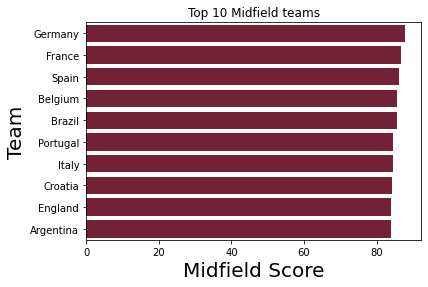

In [20]:
sns.barplot(data=fifa_midfield_top10, x='midfield_score', y='team', color="#7F1431")
plt.xlabel('Midfield Score', size = 20) 
plt.ylabel('Team', size = 20) 
plt.title("Top 10 Midfield teams");

In [21]:
# Top 10 defending teams in the last FIFA date


In [22]:
fifa_defense = df[['date', 'home_team', 'away_team', 'home_team_mean_defense_score', 'away_team_mean_defense_score']]
home = fifa_defense[['date', 'home_team', 'home_team_mean_defense_score']].rename(columns={"home_team":"team", "home_team_mean_defense_score":"defense_score"})
away = fifa_defense[['date', 'away_team', 'away_team_mean_defense_score']].rename(columns={"away_team":"team", "away_team_mean_defense_score":"defense_score"})
fifa_defense = pd.concat([home, away])
fifa_defense = fifa_defense.sort_values(['date', 'team'],ascending=[False, True])
last_defense = fifa_defense 
fifa_defense_top10 = fifa_defense.groupby('team').first().sort_values('defense_score', ascending = False)[0:10].reset_index()
fifa_defense_top10

,team,date,defense_score
0,Spain,2022-06-12,86.5
1,Portugal,2022-06-12,85.2
2,Netherlands,2022-06-14,85.2
3,England,2022-06-14,85.0
4,Brazil,2022-06-06,84.8
5,Italy,2022-06-14,84.2
6,France,2022-06-13,84.2
7,Germany,2022-06-14,84.0
8,Argentina,2022-06-05,82.2
9,Uruguay,2022-06-11,81.2


Text(0.5, 1.0, 'Top 10 Defense Teams')

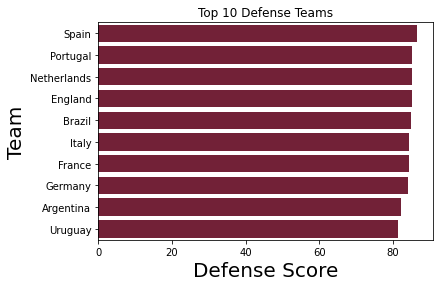

In [23]:
sns.barplot(data = fifa_defense_top10, x='defense_score', y='team', color="#7F1431")
plt.xlabel('Defense Score', size = 20) 
plt.ylabel('Team', size = 20) 
plt.title("Top 10 Defense Teams")

In [24]:
# Do Home teams have any advantage? Morroco 

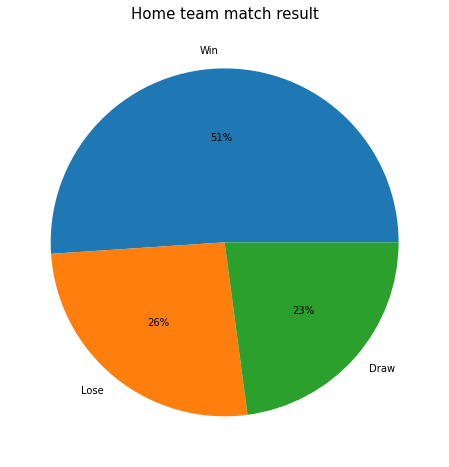

In [25]:
# Select all matches played at non-neutral locations
home_team_advantage = df[df['neutral_location'] == False]['home_team_result'].value_counts(normalize = True)

# Plot
fig, axes = plt.subplots(1, 1, figsize=(8,8))
ax =plt.pie(home_team_advantage  ,labels = ['Win', 'Lose', 'Draw'], autopct='%.0f%%')
plt.title('Home team match result', fontsize = 15)
plt.show()

In [26]:
# As the graph shows, the home team has an advantage over the away team. This is due to factors such as the fans,
# the weather and the confidence of the players.
#  For this reason, in the World Cup, those teams that sit at home will have an advantage

In [27]:
# DATA PREPARATION AND FEATURE ENGINEERING
# In this section, I will fill in the empty fields in the dataset and clean up the data for teams that 
# did not qualify for the World Cup. Then, I will use the correlation matrix to choose the characteristics that
# will define the training dataset of the Machine Learning model. Finally, I will use the ratings of the teams in their 
# last match to define the "Last Team Scores" dataset (i.e., the dataset that I will use to predict the World Cup matches).


In [28]:
df.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [29]:
# We can fill mean for na's in goal_keeper_score
df[df['home_team'] == "Brazil"]['home_team_goalkeeper_score'].describe()

count    135.000000
mean      86.074074
std        3.327026
min       82.000000
25%       83.000000
50%       86.000000
75%       89.000000
max       93.000000
Name: home_team_goalkeeper_score, dtype: float64

In [30]:
df['home_team_goalkeeper_score'] = round(df.groupby("home_team")["home_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))
df['away_team_goalkeeper_score'] = round(df.groupby("away_team")["away_team_goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))

In [32]:
# We can fill mean for na's in defense score
df[df['away_team'] == "France"]['home_team_mean_defense_score'].describe()

count    79.000000
mean     77.641772
std       6.327385
min      62.200000
25%      72.900000
50%      78.200000
75%      82.750000
max      90.200000
Name: home_team_mean_defense_score, dtype: float64

In [33]:
df['home_team_mean_defense_score'] = round(df.groupby('home_team')['home_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_defense_score'] = round(df.groupby('away_team')['away_team_mean_defense_score'].transform(lambda x : x.fillna(x.mean())))

In [35]:
# We can fill mean for na's in offense score
df[df['away_team'] == "France"]['home_team_mean_offense_score'].describe()

count    80.000000
mean     78.531250
std       6.229546
min      60.700000
25%      74.300000
50%      78.850000
75%      83.700000
max      92.700000
Name: home_team_mean_offense_score, dtype: float64

In [37]:
df['home_team_mean_offense_score'] = round(df.groupby('home_team')['home_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_offense_score'] = round(df.groupby('away_team')['away_team_mean_offense_score'].transform(lambda x : x.fillna(x.mean())))

In [39]:
# We can fill mean for na's in midfield score
df[df['away_team'] == "France"]['home_team_mean_midfield_score'].describe()

count    81.000000
mean     78.788889
std       6.223805
min      62.800000
25%      74.800000
50%      78.800000
75%      84.000000
max      92.000000
Name: home_team_mean_midfield_score, dtype: float64

In [40]:
df['home_team_mean_midfield_score'] = round(df.groupby('home_team')['home_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))
df['away_team_mean_midfield_score'] = round(df.groupby('away_team')['away_team_mean_midfield_score'].transform(lambda x : x.fillna(x.mean())))

In [41]:
df.isnull().sum()

date                                0
home_team                           0
away_team                           0
home_team_continent                 0
away_team_continent                 0
home_team_fifa_rank                 0
away_team_fifa_rank                 0
home_team_total_fifa_points         0
away_team_total_fifa_points         0
home_team_score                     0
away_team_score                     0
tournament                          0
city                                0
country                             0
neutral_location                    0
shoot_out                           0
home_team_result                    0
home_team_goalkeeper_score       5683
away_team_goalkeeper_score       6254
home_team_mean_defense_score     8019
home_team_mean_offense_score     6995
home_team_mean_midfield_score    6955
away_team_mean_defense_score     8285
away_team_mean_offense_score     7165
away_team_mean_midfield_score    7036
dtype: int64

In [42]:
# Teams are not available in FIFA game itself, so they are not less than average performing teams, so giving a
# average score of 50 for all.
df.fillna(50,inplace=True)

In [43]:
# Filter the teams participating in QATAR - World cup 2022

In [44]:
list_2022 = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 'Korea Republic', 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 'Wales', 'Australia', 'Costa Rica']
final_df = df[(df["home_team"].apply(lambda x: x in list_2022)) | (df["away_team"].apply(lambda x: x in list_2022))]

In [46]:
# **Top 10 teams in QATAR 2022**

In [50]:
rank = final_df[['date','home_team','away_team','home_team_fifa_rank', 'away_team_fifa_rank']]
home = rank[['date','home_team','home_team_fifa_rank']].rename(columns={"home_team":"team","home_team_fifa_rank":"rank"})
away = rank[['date','away_team','away_team_fifa_rank']].rename(columns={"away_team":"team","away_team_fifa_rank":"rank"})
rank = pd.concat([home,away])

# Select each country latest match
rank = rank.sort_values(['team','date'],ascending=[True,False])
rank_top10 = rank.groupby('team').first().sort_values('rank',ascending=True).reset_index()
rank_top10 = rank_top10[(rank_top10["team"].apply(lambda x: x in list_2022))][0:33]
rank_top10

,team,date,rank
0,Brazil,2022-06-06,1
1,Belgium,2022-06-14,2
2,France,2022-06-13,3
3,Argentina,2022-06-05,4
4,England,2022-06-14,5
6,Spain,2022-06-12,7
7,Portugal,2022-06-12,8
8,Mexico,2022-06-14,9
9,Netherlands,2022-06-14,10
10,Denmark,2022-06-13,11


In [51]:
rank_top10['Home_win_Per'] = np.vectorize(home_percentage)(rank_top10['team'])
rank_top10['Away_win_Per'] = np.vectorize(away_percentage)(rank_top10['team'])
rank_top10['Average_win_Per'] = round((rank_top10['Home_win_Per'] + rank_top10['Away_win_Per'])/2)
rank_top10_Win = rank_top10.sort_values('Average_win_Per',ascending=False)
rank_top10_Win

,team,date,rank,Home_win_Per,Away_win_Per,Average_win_Per
0,Brazil,2022-06-06,1,78,60,69.0
6,Spain,2022-06-12,7,77,61,69.0
2,France,2022-06-13,3,66,57,62.0
11,Germany,2022-06-14,12,63,59,61.0
20,IR Iran,2022-06-12,21,70,48,59.0
3,Argentina,2022-06-05,4,68,49,58.0
4,England,2022-06-14,5,64,51,58.0
7,Portugal,2022-06-12,8,67,49,58.0
9,Netherlands,2022-06-14,10,62,55,58.0
15,Croatia,2022-06-13,16,60,48,54.0


Text(0.5, 1.0, 'Top 10 QATAR 2022 teams with the highest winning percentage')

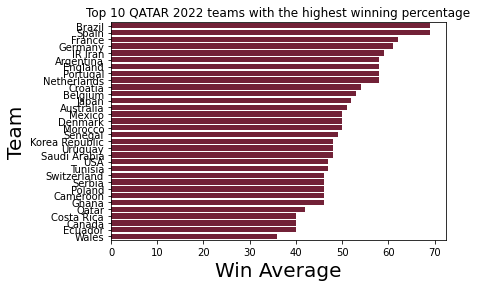

In [52]:
sns.barplot(data=rank_top10_Win,x='Average_win_Per',y='team',color="#7F1431")
plt.xticks()
plt.xlabel('Win Average', size = 20) 
plt.ylabel('Team', size = 20) 
plt.title('Top 10 QATAR 2022 teams with the highest winning percentage')

In [53]:
### Correlation Matrix

In [54]:
# Mapping numeric values for home_team_result to find the correleations
final_df['home_team_result'] = final_df['home_team_result'].map({'Win':1, 'Draw':2, 'Lose':0})

In [55]:
final_df.corr()['home_team_result'].sort_values(ascending=False)

home_team_result                 1.000000
home_team_mean_offense_score     0.165981
home_team_mean_defense_score     0.158841
home_team_mean_midfield_score    0.157639
home_team_score                  0.127916
home_team_goalkeeper_score       0.122509
away_team_fifa_rank              0.111366
home_team_total_fifa_points      0.015498
away_team_total_fifa_points     -0.047726
neutral_location                -0.066361
away_team_mean_offense_score    -0.117055
away_team_mean_defense_score    -0.122415
away_team_goalkeeper_score      -0.124837
away_team_mean_midfield_score   -0.127505
home_team_fifa_rank             -0.186355
away_team_score                 -0.464635
Name: home_team_result, dtype: float64

In [56]:
final_df = final_df.drop(['date', 'home_team_continent', 'away_team_continent', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'home_team_score', 'away_team_score', 'tournament', 'city', 'country', 'neutral_location', 'shoot_out'],axis=1)

In [57]:
final_df.columns

Index(['home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_result', 'home_team_goalkeeper_score',
       'away_team_goalkeeper_score', 'home_team_mean_defense_score',
       'home_team_mean_offense_score', 'home_team_mean_midfield_score',
       'away_team_mean_defense_score', 'away_team_mean_offense_score',
       'away_team_mean_midfield_score'],
      dtype='object')

In [58]:
# Change column names
final_df.rename(columns={"home_team":"Team1", "away_team":"Team2", "home_team_fifa_rank":"Team1_FIFA_RANK", 
                         "away_team_fifa_rank":"Team2_FIFA_RANK", "home_team_result":"Team1_Result", "home_team_goalkeeper_score":"Team1_Goalkeeper_Score",
                        "away_team_goalkeeper_score":"Team2_Goalkeeper_Score", "home_team_mean_defense_score":"Team1_Defense",
                        "home_team_mean_offense_score":"Team1_Offense", "home_team_mean_midfield_score":"Team1_Midfield",
                        "away_team_mean_defense_score":"Team2_Defense", "away_team_mean_offense_score":"Team2_Offense",
                        "away_team_mean_midfield_score":"Team2_Midfield"}, inplace=True)

<AxesSubplot:>

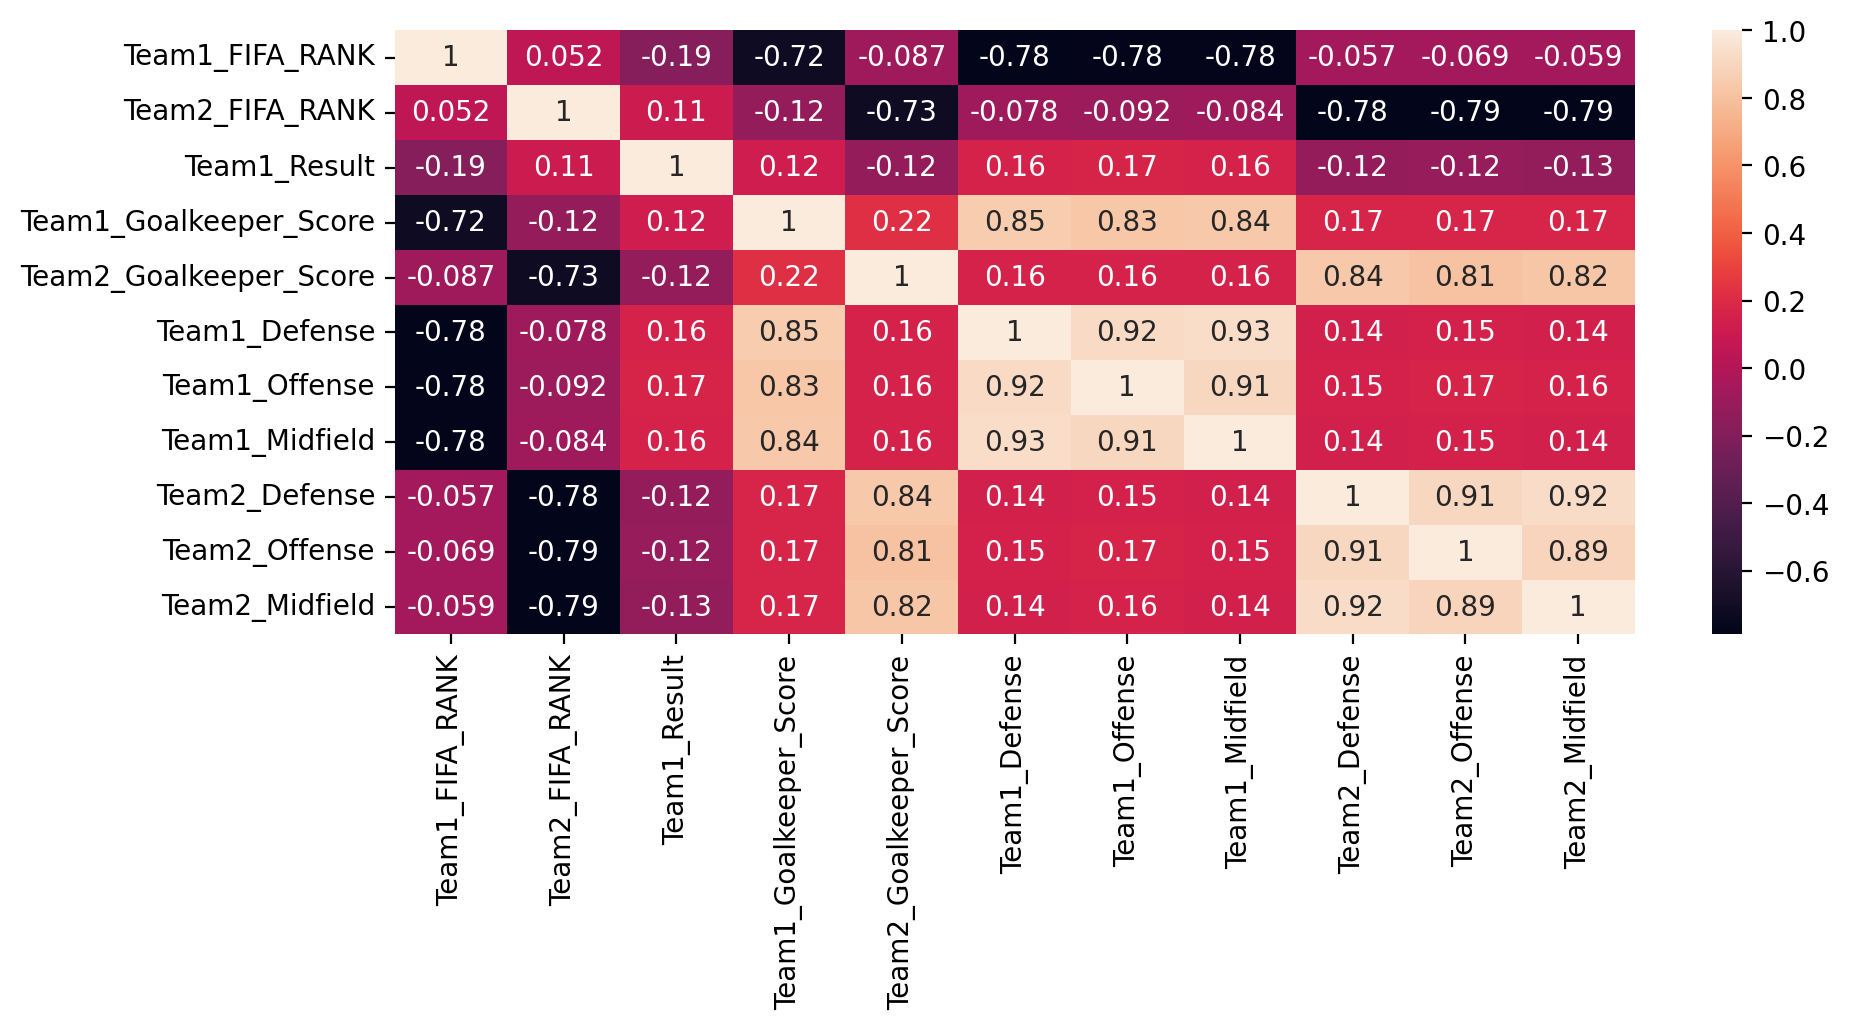

In [59]:
plt.figure(figsize=(10, 4), dpi=200)
sns.heatmap(final_df.corr(), annot=True)

In [60]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9321 entries, 0 to 23920
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Team1                   9321 non-null   object 
 1   Team2                   9321 non-null   object 
 2   Team1_FIFA_RANK         9321 non-null   int64  
 3   Team2_FIFA_RANK         9321 non-null   int64  
 4   Team1_Result            9321 non-null   int64  
 5   Team1_Goalkeeper_Score  9321 non-null   float64
 6   Team2_Goalkeeper_Score  9321 non-null   float64
 7   Team1_Defense           9321 non-null   float64
 8   Team1_Offense           9321 non-null   float64
 9   Team1_Midfield          9321 non-null   float64
 10  Team2_Defense           9321 non-null   float64
 11  Team2_Offense           9321 non-null   float64
 12  Team2_Midfield          9321 non-null   float64
dtypes: float64(8), int64(3), object(2)
memory usage: 1019.5+ KB


In [61]:
final_df

,Team1,Team2,Team1_FIFA_RANK,Team2_FIFA_RANK,Team1_Result,Team1_Goalkeeper_Score,Team2_Goalkeeper_Score,Team1_Defense,Team1_Offense,Team1_Midfield,Team2_Defense,Team2_Offense,Team2_Midfield
0,Bolivia,Uruguay,59,22,1,67.0,79.0,67.0,69.0,68.0,80.0,83.0,79.0
1,Brazil,Mexico,8,14,2,86.0,79.0,86.0,86.0,85.0,77.0,79.0,78.0
2,Ecuador,Venezuela,35,94,1,71.0,68.0,71.0,75.0,75.0,72.0,75.0,73.0
4,Paraguay,Argentina,67,5,0,74.0,81.0,75.0,78.0,74.0,83.0,88.0,85.0
9,Sweden,Switzerland,4,3,0,76.0,81.0,77.0,81.0,78.0,78.0,76.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23908,Netherlands,Wales,10,18,1,81.0,74.0,85.0,83.0,84.0,75.0,73.0,78.0
23909,Poland,Belgium,26,2,0,87.0,89.0,75.0,85.0,76.0,81.0,86.0,86.0
23918,Chile,Ghana,28,60,0,79.0,74.0,76.0,77.0,78.0,76.0,76.0,78.0
23919,Japan,Tunisia,23,35,0,73.0,64.0,75.0,75.0,78.0,71.0,72.0,74.0


In [62]:
final_df.to_csv("../Datasets/training.csv", index = False)

In [64]:
### Creating "Last Team Scores" dataset
# This dataset contains the qualifications of each team on the previous FIFA date and will be used to predict 
# the World Cup matches.

In [65]:
last_goalkeeper = df[['date', 'home_team', 'away_team', 'home_team_goalkeeper_score', 'away_team_goalkeeper_score']]
home = last_goalkeeper[['date', 'home_team', 'home_team_goalkeeper_score']].rename(columns={"home_team":"team", "home_team_goalkeeper_score":"goalkeeper_score"})
away = last_goalkeeper[['date', 'away_team', 'away_team_goalkeeper_score']].rename(columns={"away_team":"team", "away_team_goalkeeper_score":"goalkeeper_score"})
last_goalkeeper = pd.concat([home,away])

last_goalkeeper = last_goalkeeper.sort_values(['date', 'team'],ascending=[False, True])

list_2022 = ['Qatar', 'Germany', 'Denmark', 'Brazil', 'France', 'Belgium', 'Croatia', 'Spain', 'Serbia', 'England', 'Switzerland', 'Netherlands', 'Argentina', 'IR Iran', 'Korea Republic', 'Japan', 'Saudi Arabia', 'Ecuador', 'Uruguay', 'Canada', 'Ghana', 'Senegal', 'Portugal', 'Poland', 'Tunisia', 'Morocco', 'Cameroon', 'USA', 'Mexico', 'Wales', 'Australia', 'Costa Rica']

rank_qatar = last_rank[(last_rank["team"].apply(lambda x: x in list_2022))]
rank_qatar = rank_qatar.groupby('team').first().reset_index()
goal_qatar = last_goalkeeper[(last_goalkeeper["team"].apply(lambda x: x in list_2022))]
goal_qatar = goal_qatar.groupby('team').first().reset_index()
goal_qatar = goal_qatar.drop(['date'], axis = 1)
off_qatar = last_offense[(last_offense["team"].apply(lambda x: x in list_2022))]
off_qatar = off_qatar.groupby('team').first().reset_index()
off_qatar = off_qatar.drop(['date'], axis = 1)
mid_qatar = last_midfield[(last_midfield["team"].apply(lambda x: x in list_2022))]
mid_qatar = mid_qatar.groupby('team').first().reset_index()
mid_qatar = mid_qatar.drop(['date'], axis = 1)
def_qatar = last_defense[(last_defense["team"].apply(lambda x: x in list_2022))]
def_qatar = def_qatar.groupby('team').first().reset_index()
def_qatar = def_qatar.drop(['date'], axis = 1)

qatar = pd.merge(rank_qatar, goal_qatar, on = 'team')
qatar = pd.merge(qatar, def_qatar, on ='team')
qatar = pd.merge(qatar, off_qatar, on ='team')
qatar = pd.merge(qatar, mid_qatar, on ='team')

qatar['goalkeeper_score'] = round(qatar["goalkeeper_score"].transform(lambda x: x.fillna(x.mean())))
qatar['offense_score'] = round(qatar["offense_score"].transform(lambda x: x.fillna(x.mean())))
qatar['midfield_score'] = round(qatar["midfield_score"].transform(lambda x: x.fillna(x.mean())))
qatar['defense_score'] = round(qatar["defense_score"].transform(lambda x: x.fillna(x.mean())))
qatar.head(5)

,team,date,rank,goalkeeper_score,defense_score,offense_score,midfield_score
0,Argentina,2022-06-05,4,84.0,82.0,89.0,84.0
1,Australia,2022-06-13,42,77.0,72.0,72.0,74.0
2,Belgium,2022-06-14,2,89.0,81.0,86.0,86.0
3,Brazil,2022-06-06,1,89.0,85.0,86.0,86.0
4,Cameroon,2022-06-09,37,67.0,77.0,78.0,75.0


In [66]:
qatar.to_csv("../Datasets/last_team_scores.csv", index = False)

In [67]:
# End of Feature Eng  

In [68]:
# Droobi & Nabeel 
